In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv(os.path.join("db", "AMR_raw_output_file.tsv"), sep='\t')
#print(df.columns)
df = df[['Name', 'Element symbol', 'Type', 'Class']]
# Quitar headers
df = df[df['Name'] != 'Name']
## Cambio valores nombres por assemblies barcode
df = df.rename(columns={'Name': 'Assembly Barcode', 'Element symbol': 'Resistance gene'})
df['Assembly Barcode'] = df['Assembly Barcode'].str.replace(r'(\..*)', '', regex=True)
### Merge
data = pd.read_csv(os.path.join("out", "Salmonella_Chile_201124_filt.tsv"), sep='\t')
db = pd.merge(df, data, on='Assembly Barcode', how='left').reset_index(drop=True)
db = db.set_index('Assembly Barcode')
db

,Resistance gene,Type,Class,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year
Assembly Barcode,,,,,,,,
SAL_IA5729AA_AS,sinH,VIRULENCE,NaN,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,sul1,AMR,SULFONAMIDE,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,qacEdelta1,STRESS,QUATERNARY AMMONIUM,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,mdsB,AMR,EFFLUX,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,mdsA,AMR,EFFLUX,Typhimurium,305,305,Livestock,2006
...,...,...,...,...,...,...,...,...
SAL_RD3120AA_AS,golS,STRESS,GOLD,Infantis,343,36,Food,2024
SAL_RD3120AA_AS,golT,STRESS,COPPER/GOLD,Infantis,343,36,Food,2024
SAL_RD3120AA_AS,mdsA,AMR,EFFLUX,Infantis,343,36,Food,2024


In [3]:
"""
Filtros: solo AMR, ignorar mdsA y mdsB
"""
solo_AMR = db[db['Type'] == 'AMR']
amr = solo_AMR.drop(columns=['Type'])
amr = amr[amr['Resistance gene'] != 'mdsA']
amr = amr[amr['Resistance gene'] != 'mdsB']
print(f"Total AMR: {amr.shape[0]}")
amr['HC20'] = amr['HC20'].astype(str)
amr['SISTR1 Serovar HC20'] = amr['SISTR1 Serovar'] + " " + amr['HC20']
amr = amr.sort_values(by='SISTR1 Serovar HC20')
amr['HC50'] = amr['HC50'].astype(str)
amr['SISTR1 Serovar HC50'] = amr['SISTR1 Serovar'] + " " + amr['HC50']
amr = amr.sort_values(by='SISTR1 Serovar HC50')
amr

Total AMR: 2155


,Resistance gene,Class,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year,SISTR1 Serovar HC20,SISTR1 Serovar HC50
Assembly Barcode,,,,,,,,,
SAL_AD8849AA_AS,floR,PHENICOL,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,blaTEM-1,BETA-LACTAM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,dfrA12,TRIMETHOPRIM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,aadA2,AMINOGLYCOSIDE,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,sul1,SULFONAMIDE,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
...,...,...,...,...,...,...,...,...,...
SAL_DC0019AA_AS,blaCARB-2,BETA-LACTAM,Typhimurium,305,305,Environment,2019,Typhimurium 305,Typhimurium 305
SAL_DC0019AA_AS,sul1,SULFONAMIDE,Typhimurium,305,305,Environment,2019,Typhimurium 305,Typhimurium 305
SAL_DC0019AA_AS,aadA2,AMINOGLYCOSIDE,Typhimurium,305,305,Environment,2019,Typhimurium 305,Typhimurium 305


In [4]:
"""
Filtros: amr solo de familias de importancia
"""
FAMILIAS = ['QUINOLONE', 'BETA-LACTAM', 'MACROLIDE', 'TRIMETHOPRIM']
amr_de_importancia = amr[amr['Class'].isin(FAMILIAS)]
print(f"Total AMR relevantes: {amr_de_importancia.shape[0]}")
amr_de_importancia

Total AMR relevantes: 598


,Resistance gene,Class,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year,SISTR1 Serovar HC20,SISTR1 Serovar HC50
Assembly Barcode,,,,,,,,,
SAL_AD8849AA_AS,blaTEM-1,BETA-LACTAM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,dfrA12,TRIMETHOPRIM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_QD2199AA_AS,blaTEM-1,BETA-LACTAM,Agona,419,29,Environment,2022,Agona 419,Agona 29
SAL_QD2199AA_AS,qnrS1,QUINOLONE,Agona,419,29,Environment,2022,Agona 419,Agona 29
SAL_ZC7016AA_AS,dfrA17,TRIMETHOPRIM,Agona,419,29,Companion Animal,2021,Agona 419,Agona 29
...,...,...,...,...,...,...,...,...,...
SAL_MB2476AA_AS,blaCARB-2,BETA-LACTAM,Typhimurium,305,305,Environment,2016,Typhimurium 305,Typhimurium 305
SAL_MB2470AA_AS,blaCARB-2,BETA-LACTAM,Typhimurium,305,305,Environment,2015,Typhimurium 305,Typhimurium 305
SAL_PD4169AA_AS,blaCARB-2,BETA-LACTAM,Typhimurium,305,305,Environment,2022,Typhimurium 305,Typhimurium 305


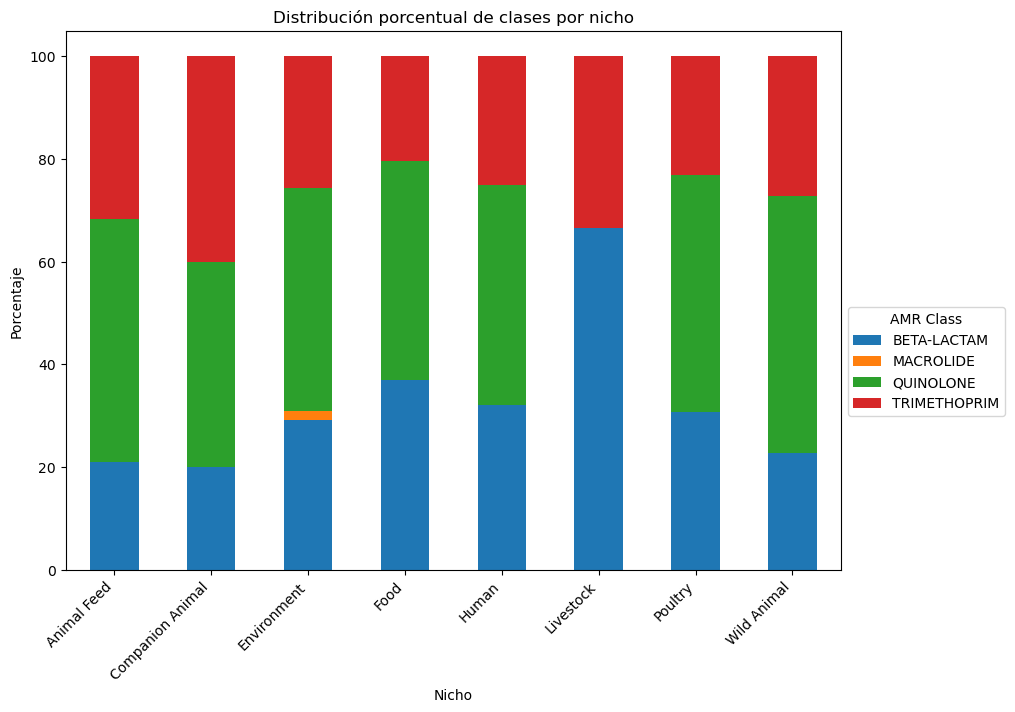

In [8]:
"""
Porcentaje de AMR de las familias de importancia por nicho de aislamiento
"""
df_counts = amr_de_importancia.groupby(['Source Niche', 'Class']).size().unstack(fill_value=0)
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

df_percent.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.legend(title='AMR Class', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Nicho')
plt.ylabel('Porcentaje')
plt.title('Distribución porcentual de clases por nicho')
plt.xticks(rotation=45, ha='right')
save = os.path.join("presentacion-img", "stackedplot_clases_de_importancia_por_nicho.png")
plt.savefig(save, format='png', dpi=900)
plt.show()

In [14]:
df_counts

Class,BETA-LACTAM,MACROLIDE,QUINOLONE,TRIMETHOPRIM
Source Niche,,,,
Animal Feed,4,0,9,6
Companion Animal,2,0,4,4
Environment,100,6,149,88
Food,40,0,46,22
Human,9,0,12,7
Livestock,2,0,0,1
Poultry,20,0,30,15
Wild Animal,5,0,11,6


### Heatmap

In [18]:
amr_de_importancia
test = amr_de_importancia[amr_de_importancia['SISTR1 Serovar HC20'] == 'Agona 419']
test.index.unique()

Index(['SAL_QD2199AA_AS', 'SAL_ZC7016AA_AS', 'SAL_JC3732AA_AS',
       'SAL_DC0057AA_AS'],
      dtype='object', name='Assembly Barcode')

In [82]:
def make_matrix(df, HC: str):
    amr_matrix = df.groupby([f'SISTR1 Serovar {HC}', 'Resistance gene']).size().unstack(fill_value=0)
    tipo_familia_dict = dict(zip(df['Resistance gene'], df['Class']))
    sorted_columns = sorted(amr_matrix.columns, key=lambda x: (tipo_familia_dict.get(x, ''), x))
    matrix = amr_matrix[sorted_columns]
    ## mono de Typhimurium
    mono = ['I 1,4,[5],12:i:- 2']
    new_sort = [idx for idx in matrix.index if idx not in mono] + mono
    matrix = matrix.reindex(new_sort)
    ## mv floR
    #floR = ['floR']
    #new_sort = [col for col in matrix.columns if col not in floR] + floR
    return matrix

In [83]:
SEROTIPOS = ['Typhimurium', 'Newport', 'Enteritidis', 'Infantis', 'I 1,4,[5],12:i:-', 'Agona']

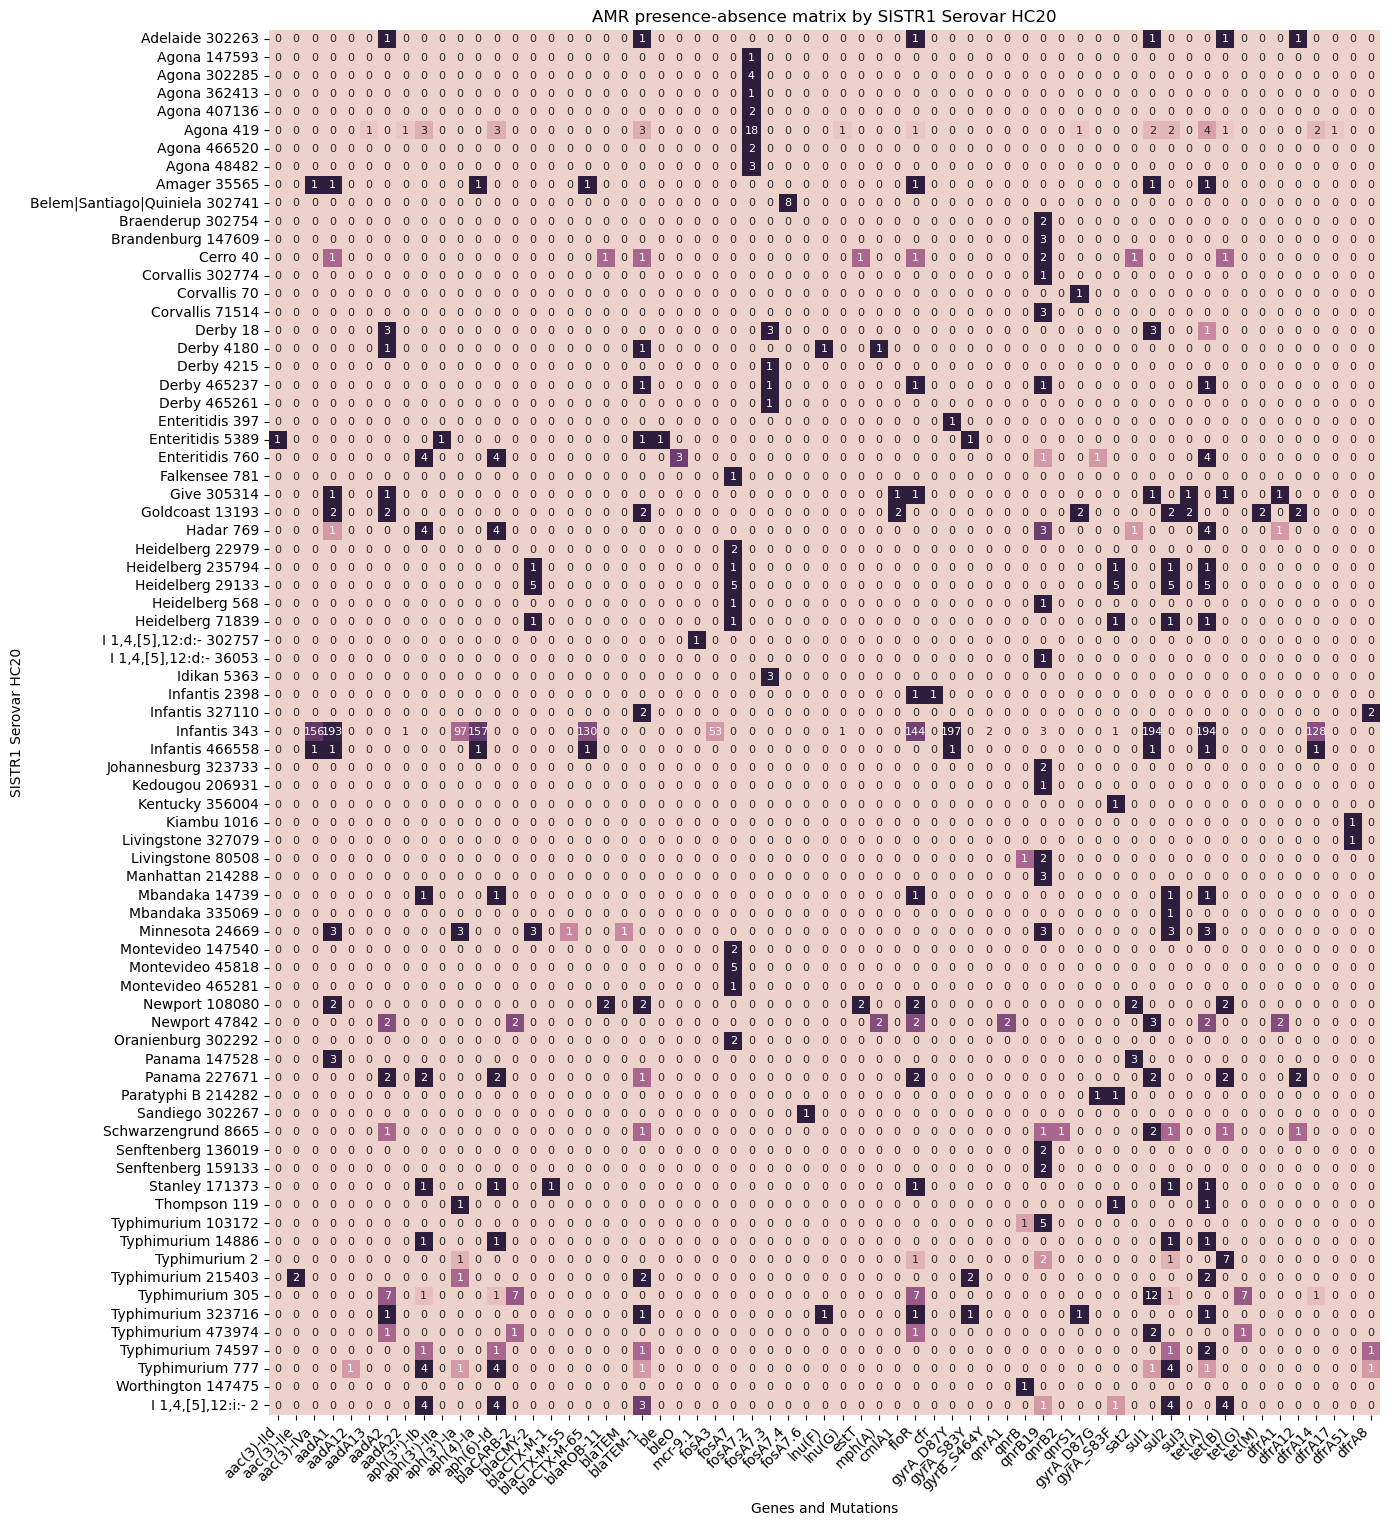

In [84]:
"""
Mapa de calor, porcentaje AMR en cluster HC
"""
HC = 'HC20'
arm_matrix_todos_los_genomas = make_matrix(amr, HC)
heat_map = arm_matrix_todos_los_genomas.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 18))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=arm_matrix_todos_los_genomas, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

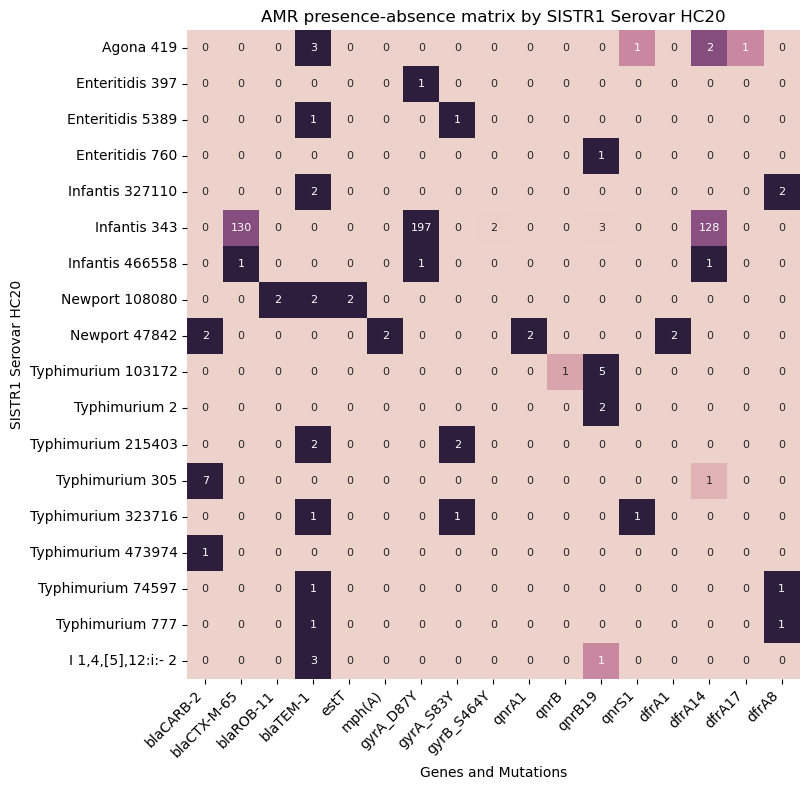

In [85]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
amr_genomas_de_importancia = amr[amr['SISTR1 Serovar'].isin(SEROTIPOS)]
amr_genomas_de_importancia = amr_genomas_de_importancia[amr_genomas_de_importancia['Class'].isin(FAMILIAS)]
arm_matrix_genomas_de_importancia = make_matrix(amr_genomas_de_importancia, HC)
heat_map = arm_matrix_genomas_de_importancia.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=arm_matrix_genomas_de_importancia, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

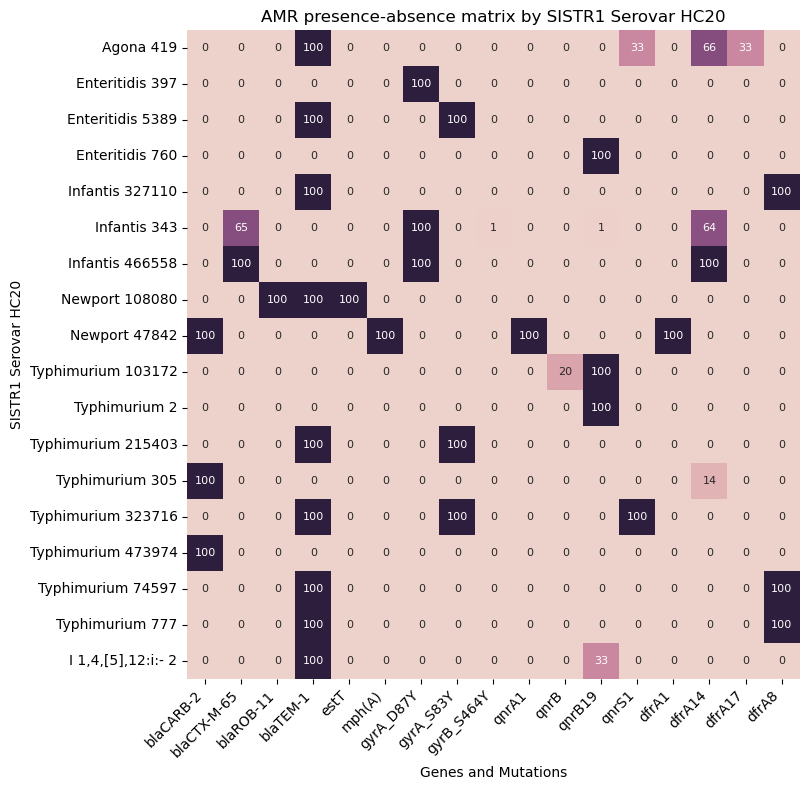

In [86]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
amr_genomas_de_importancia = amr[amr['SISTR1 Serovar'].isin(SEROTIPOS)]
amr_genomas_de_importancia = amr_genomas_de_importancia[amr_genomas_de_importancia['Class'].isin(FAMILIAS)]
arm_matrix_genomas_de_importancia = make_matrix(amr_genomas_de_importancia, HC)
heat_map = arm_matrix_genomas_de_importancia.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

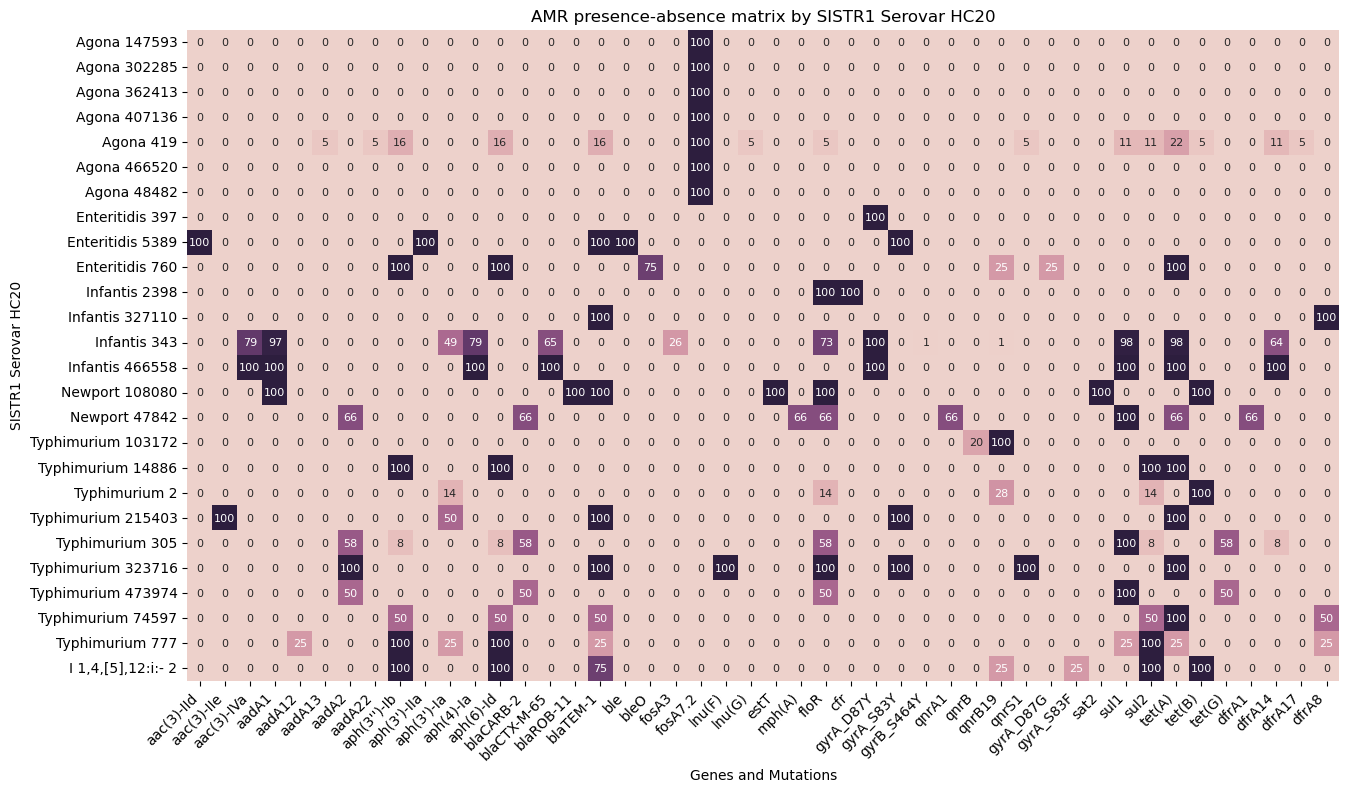

In [87]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
amr_genomas_de_importancia = amr[amr['SISTR1 Serovar'].isin(SEROTIPOS)]
#amr_genomas_de_importancia = amr_genomas_de_importancia[amr_genomas_de_importancia['Class'].isin(FAMILIAS)]
arm_matrix_genomas_de_importancia = make_matrix(amr_genomas_de_importancia, HC)
heat_map = arm_matrix_genomas_de_importancia.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

In [88]:
len(amr_genomas_de_importancia['Class'].unique())

14

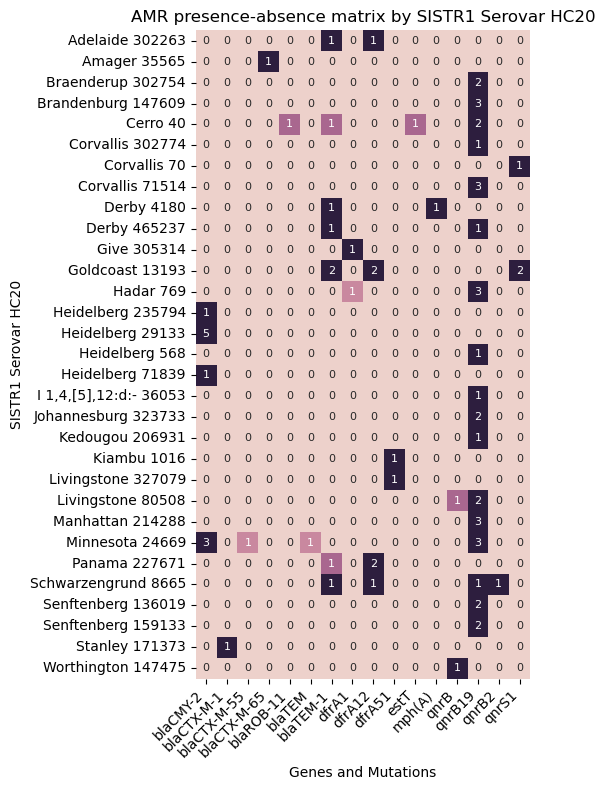

In [89]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
amr_genomas_de_importancia = amr[~amr['SISTR1 Serovar'].isin(SEROTIPOS)]
amr_genomas_de_importancia = amr_genomas_de_importancia[amr_genomas_de_importancia['Class'].isin(FAMILIAS)]
amr_matrix = amr_genomas_de_importancia.groupby([f'SISTR1 Serovar {HC}', 'Resistance gene']).size().unstack(fill_value=0)
## mv floR
#floR = ['floR']
##new_sort = [col for col in amr_matrix.columns if col not in floR] + floR
#amr_matrix = amr_matrix[new_sort]

#arm_matrix_genomas_de_importancia = make_matrix(amr_genomas_de_importancia, HC)
heat_map = amr_matrix.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=amr_matrix, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

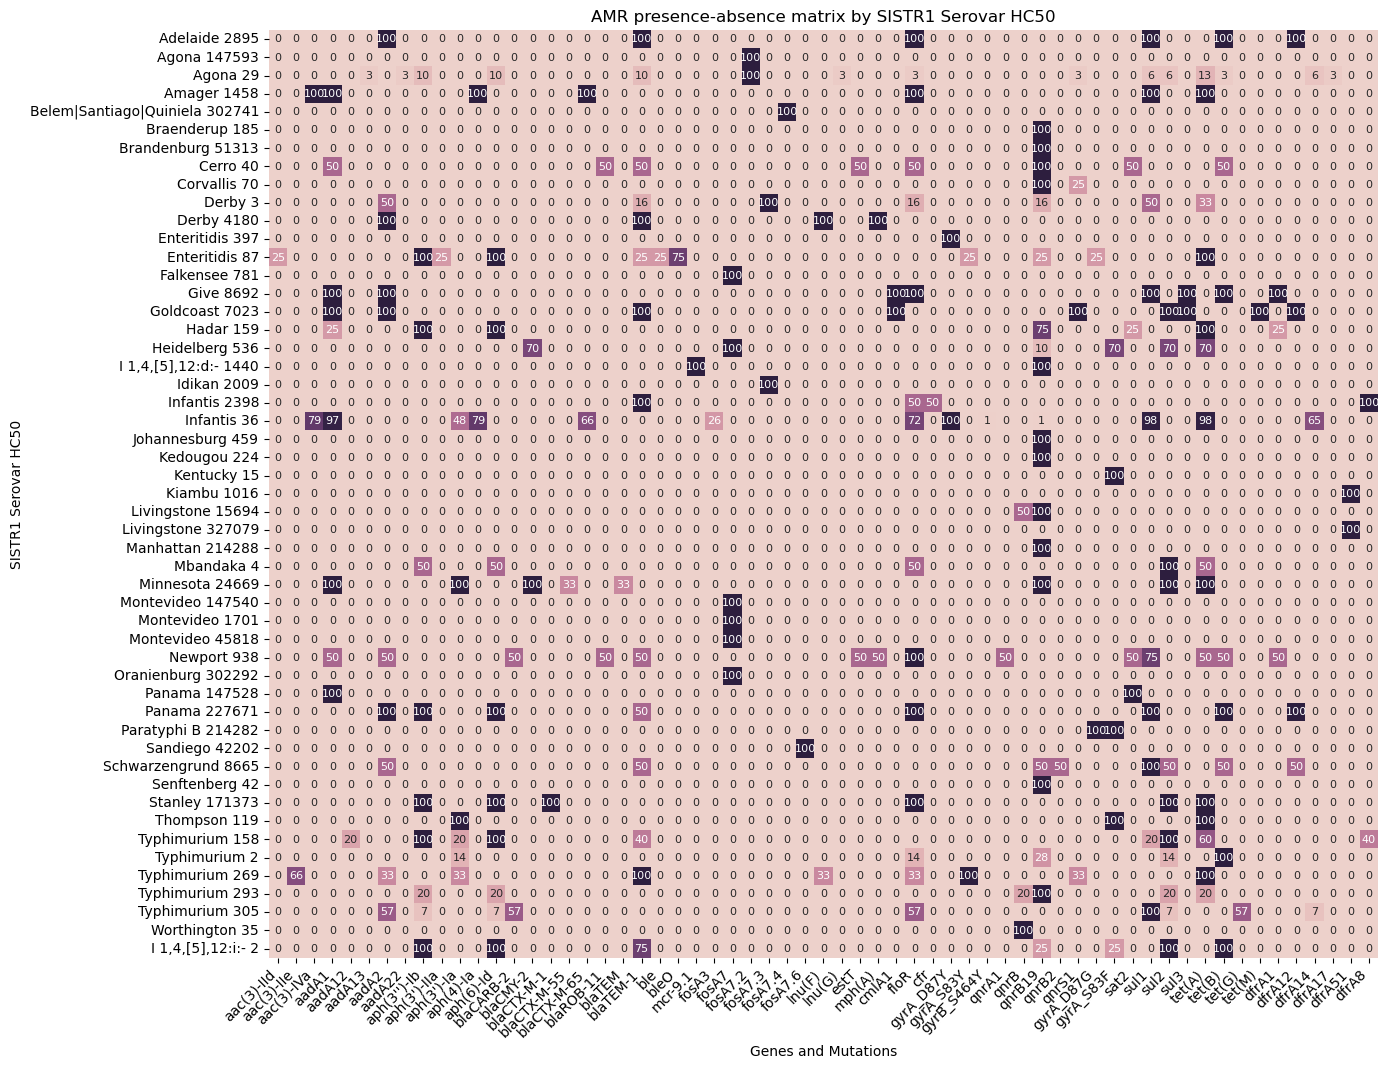

In [90]:
"""
Mapa de calor, porcentaje AMR en cluster HC
"""
HC = 'HC50'
arm_matrix_todos_los_genomas = make_matrix(amr, HC)
heat_map = arm_matrix_todos_los_genomas.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 18))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

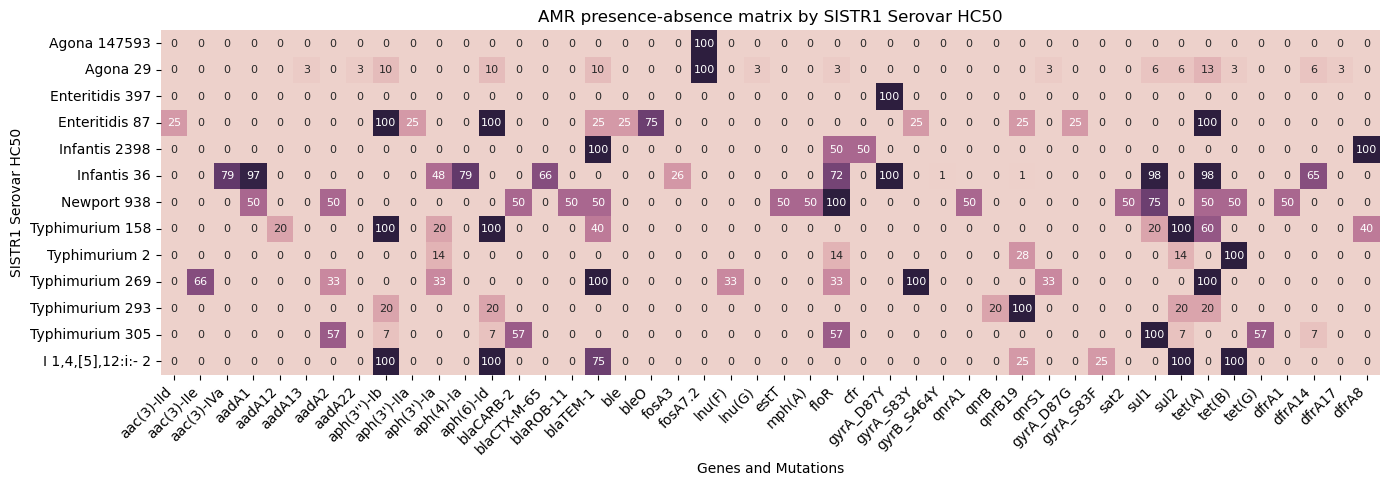

In [91]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC50'
amr_genomas_de_importancia = amr[amr['SISTR1 Serovar'].isin(SEROTIPOS)]
arm_matrix_genomas_de_importancia = make_matrix(amr_genomas_de_importancia, HC)
heat_map = arm_matrix_genomas_de_importancia.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()